## Congruencial

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import math

def  congruencial(x0):
    a = 1664525
    b = 1013904223
    m = 2**32
    xi = x0
    ui =0
    xi = (a*xi + b)%(m)
    ui = float(xi)/float(m)

    return ui,xi

## Exponencial

In [3]:
def expon(landa,x0):
    ui,x0 = congruencial(x0)   
    exp = (-math.log(1-ui))/landa   
    return exp,x0 

## Uniforme

In [4]:
def uniforme(a,b,x0):
    ui,x0 = congruencial(x0)
    uni = a + ui*(b-a)     
    return uni,x0

## Promedio

In [5]:
def promedio(lista):
    sum=0.0
    for i in range(0,len(lista)):
        sum=sum+lista[i]
        
    return sum/len(lista)

Bank renege
 0.0000 Customer00: Here I am
 0.0000 Customer00: Waited  0.000
 1.4541 Customer01: Here I am
 1.9153 Customer02: Here I am
 3.7806 Customer00: Finished
 3.7806 Customer01: Waited  2.327
 4.9799 Customer01: Finished
 4.9799 Customer02: Waited  3.065
 6.2206 Customer03: Here I am
 7.4793 Customer04: Here I am
10.2206 Customer03: RENEGED after  4.000
11.4793 Customer04: RENEGED after  4.000
16.1735 Customer02: Finished
numero De clientes  = 5
numero De  Clientes Atendidos = 3
numero De Clientes que Abandonaron = 2
personas en la fila
[1, 0, 1, 2, 1, 0, 1, 2, 1, 0]
clientes en el banco
[1, 2, 3, 2, 1, 2, 3, 2, 1, 0]
personas primedio en fila
1


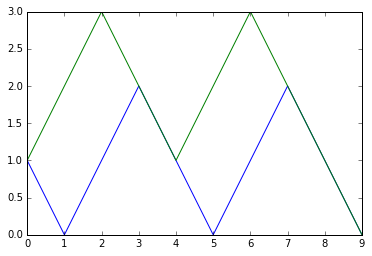

In [36]:
"""
Bank renege example

Covers:

- Resources: Resource
- Condition events

Scenario:
  A counter with a random service time and customers who renege. Based on the
  program bank08.py from TheBank tutorial of SimPy 2. (KGM)

"""
import random

import simpy


RANDOM_SEED = 42
x0uniform =RANDOM_SEED
x0expon  = RANDOM_SEED


#NEW_CUSTOMERS = 5  # Total number of customers - Número total de clientes
#INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds -Generar nuevos clientes aproximadamente cada x segundos
#MIN_PATIENCE = 1  # Min. customer patience - Mini. paciencia de los clientes
#MAX_PATIENCE = 3  # Max. customer patience - Max. paciencia de los clientes


NEW_CUSTOMERS = 5
INTERVAL_CUSTOMERS =5 
MIN_PATIENCE = 4
MAX_PATIENCE = 10
time_in_bank = 13
numeroDeClientes = 0
numeroClientesAtendidos = 0
numeroClientesAbandonaron = 0
tiempoPromedioEspera = 0
tamfila = 0
tamanoPromedioFila = []
tiempo = []
clientEnBanc = 0
clientesEnElBanco = []
def source(env, number, interval, counter):
    """Source generates customers randomly"""
    x0 = RANDOM_SEED
    global time_in_bank
    for i in range(number):
        #c = customer(env,'Customer%02d' % i, counter, time_in_bank=12.0)
        c = customer(env,'Customer%02d' % i, counter, time_in_bank)
        env.process(c)
        #t = random.expovariate(1.0 / interval) 
        exp,x0 = expon((1.0/interval),x0)
        t = exp
        yield env.timeout(t)
    
    

def customer(env, name, counter, time_in_bank):
    #x0uniform = RANDOM_SEED
    global x0expon
    global x0uniform
    global numeroDeClientes 
    global numeroClientesAtendidos
    global numeroClientesAbandonaron
    global tamfila
    global tamanoPromedioFila
    global tiempo
    global clientEnBanc
    global clientesEnElBanco
    """Customer arrives, is served and leaves."""
    arrive = env.now
    print('%7.4f %s: Here I am' % (arrive, name))
    
    numeroDeClientes +=1
    clientEnBanc +=1
    clientesEnElBanco.append(clientEnBanc)
    #tiempo.append(arrive)
    tamfila+=1
    tamanoPromedioFila.append(tamfila)
    with counter.request() as req:
        #patience = random.uniform(MIN_PATIENCE, MIN_PATIENCE)
        patience,x0uniform = uniforme(MIN_PATIENCE,MIN_PATIENCE,x0uniform)
        #print(x0uniform)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)

        wait = env.now - arrive

        if req in results:
            # We got to the counter
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
            tamfila-=1
            tamanoPromedioFila.append(tamfila)
           
            exp,x0expon = expon((1.0/time_in_bank),x0expon)
            tib = exp            
            yield env.timeout(tib)    
            
            print('%7.4f %s: Finished' % (env.now, name))
           
            
            numeroClientesAtendidos += 1
        else:
            # We reneged
            print('%7.4f %s: RENEGED after %6.3f' % (env.now, name, wait))
            numeroClientesAbandonaron += 1
            tamfila-=1
            tamanoPromedioFila.append(tamfila)
        clientEnBanc -=1
        clientesEnElBanco.append(clientEnBanc)
        #tiempo.append(arrive)

            
            
# Setup and start the simulation
print('Bank renege')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()
print('numero De clientes  = %d'%(numeroDeClientes))
print('numero De  Clientes Atendidos = %d'%(numeroClientesAtendidos))
print('numero De Clientes que Abandonaron = %d'%(numeroClientesAbandonaron))
#print('tamanoPromedioFila = %d'%(tamanoPromedioFila))
print('personas en la fila')
print(tamanoPromedioFila)
print('clientes en el banco')
print(clientesEnElBanco)
#print(tiempo)
prom = promedio(tamanoPromedioFila)
print('personas primedio en fila')
prom =  math.ceil(prom)
print(prom)
ax = plt.gca()
ax.plot(tamanoPromedioFila,'',clientesEnElBanco,'')
plt.show()